# Population Prediction in Japan
According to the latest data, the population of Japan has decreased significantly. We intend to predict population figures with multiple models possible.

Variables:

-   Time: Month of observation

-   Region: Where the data is recorded

-   Population: Total population of Japan

-   livebirths: Total live births

-   Deaths: Total deaths per month

-   Employment_rate: The percentage of the working-age population currently employed or actively seeking employment.

-   Unemployment_rate: The percentage of the labor force that is unemployed and looking for work

-   Consumption_expenditure: The amount paid to purchase necessary goods or services for daily lives.

-   Income: Combined earnings of individuals within households

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Input data

In [ ]:
#Masukkan data
df = pd.read_csv("CopyOfraw_data_japan.csv")

#Hilangkan variabel "Region"
df = df.drop("Region", axis= 1)
df.head()

,Time,Population,livebirths,deaths,employment_rate,unemployment_rate,consumption_expenditures,income
0,Oct.2000,126925843,101834,76337,60.0,4.6,309193,488921
1,Nov.2000,126998000,97425,79761,59.9,4.5,297144,457054
2,Dec.2000,127027000,100258,87304,59.3,4.4,391556,1035616
3,Jan.2001,126912000,100688,94097,58.5,4.7,308912,453748
4,Feb.2001,127050000,88920,81460,58.5,4.8,293698,475556


## Data Processing

In [ ]:
#Ubah format tanggal
df["Time"] = pd.to_datetime(df["Time"])
df

,Time,Population,livebirths,deaths,employment_rate,unemployment_rate,consumption_expenditures,income
0,2000-10-01,126925843,101834,76337,60.0,4.6,309193,488921
1,2000-11-01,126998000,97425,79761,59.9,4.5,297144,457054
2,2000-12-01,127027000,100258,87304,59.3,4.4,391556,1035616
3,2001-01-01,126912000,100688,94097,58.5,4.7,308912,453748
4,2001-02-01,127050000,88920,81460,58.5,4.8,293698,475556
...,...,...,...,...,...,...,...,...
260,2022-06-01,125104000,63480,111489,61.3,2.7,276885,916705
261,2022-07-01,125125000,67238,117183,61.3,2.5,285313,657263
262,2022-08-01,125082000,72890,135239,61.3,2.6,289974,563963
263,2022-09-01,124971000,71593,126703,61.3,2.7,280999,499438


## Outlier

In [ ]:
#Outlier livebirths
outlivebirths = np.percentile(df['livebirths'], [25, 75])
iqr = outlivebirths[1] - outlivebirths[0]
lower_bound = outlivebirths[0] - 1.5 * iqr
upper_bound = outlivebirths[1] + 1.5 * iqr

out_ind_livebirths = df[(df['livebirths'] < lower_bound) | (df['livebirths'] > upper_bound)].index

print("live births outlier")
print(out_ind_livebirths)

#outlier deaths
outdeaths = np.percentile(df['deaths'], [25, 75])
iqr = outdeaths[1] - outdeaths[0]
lower_bound = outdeaths[0] - 1.5 * iqr
upper_bound = outdeaths[1] + 1.5 * iqr

out_ind_deaths = df[(df['deaths'] < lower_bound) | (df['deaths'] > upper_bound)].index

print("deaths outlier")
print(out_ind_deaths)

# Employment Rate
outemploymentrate = np.percentile(df['employment_rate'], [25, 75])
iqr_emp = outemploymentrate[1] - outemploymentrate[0]
lower_bound_emp = outemploymentrate[0] - 1.5 * iqr_emp
upper_bound_emp = outemploymentrate[1] + 1.5 * iqr_emp

out_ind_employmentrate = df[(df['employment_rate'] < lower_bound_emp) | (df['employment_rate'] > upper_bound_emp)].index

print("employment rate outlier")
print(out_ind_employmentrate)

# Unemployment Rate
outunemploymentrate = np.percentile(df['unemployment_rate'], [25, 75])
iqr_unemp = outunemploymentrate[1] - outunemploymentrate[0]
lower_bound_unemp = outunemploymentrate[0] - 1.5 * iqr_unemp
upper_bound_unemp = outunemploymentrate[1] + 1.5 * iqr_unemp

out_ind_unemploymentrate = df[(df['unemployment_rate'] < lower_bound_unemp) | (df['unemployment_rate'] > upper_bound_unemp)].index

print("unemployment rate outlier")
print(out_ind_unemploymentrate)

# Consumption Expenditure
consumpout = np.percentile(df['consumption_expenditures'], [25, 75])
iqr_consump = consumpout[1] - consumpout[0]
lower_bound_consump = consumpout[0] - 1.5 * iqr_consump
upper_bound_consump = consumpout[1] + 1.5 * iqr_consump

indconsumout = df[(df['consumption_expenditures'] < lower_bound_consump) | (df['consumption_expenditures'] > upper_bound_consump)].index

print("Consumption expenditure outlier")
print(indconsumout)

# Income
incomeout = np.percentile(df['income'], [25, 75])
iqr_income = incomeout[1] - incomeout[0]
lower_bound_income = incomeout[0] - 1.5 * iqr_income
upper_bound_income = incomeout[1] + 1.5 * iqr_income

indincomeout = df[(df['income'] < lower_bound_income) | (df['income'] > upper_bound_income)].index

print("income expenditure outlier")
print(indincomeout)

live births outlier
Int64Index([243, 244, 256], dtype='int64')
deaths outlier
Int64Index([], dtype='int64')
employment rate outlier
Int64Index([], dtype='int64')
unemployment rate outlier
Int64Index([], dtype='int64')
Consumption expenditure outlier
Int64Index([2, 5, 14, 26, 38, 50, 62, 74, 86, 98, 110, 158, 161], dtype='int64')
income expenditure outlier
Int64Index([  2,   8,  14,  20,  26,  32,  38,  50,  62,  74,  80,  86,  92,
             98, 110, 116, 122, 134, 146, 152, 158, 170, 176, 182, 188, 194,
            200, 206, 212, 218, 224, 230, 236, 242, 248, 254, 260],
           dtype='int64')


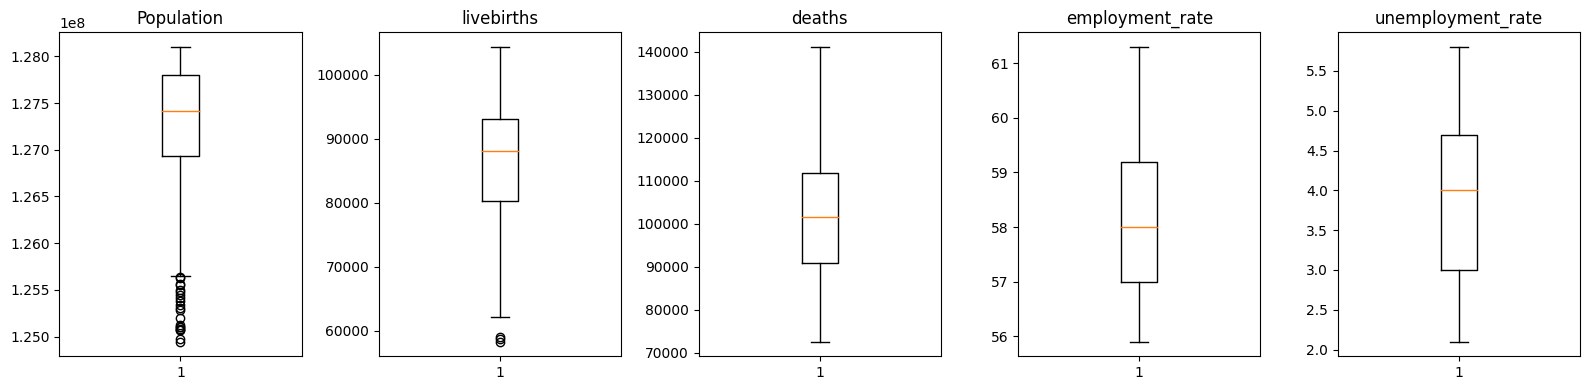

In [ ]:
# Setting up subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(16, 4))


# Boxplot for Population
axes[0].boxplot(df['Population'])
axes[0].set_title('Population')

# Boxplot for livebirths
axes[1].boxplot(df['livebirths'])
axes[1].set_title('livebirths')

# Boxplot for deaths
axes[2].boxplot(df['deaths'])
axes[2].set_title('deaths')

# Boxplot for employment_rate
axes[3].boxplot(df['employment_rate'])
axes[3].set_title('employment_rate')

# Boxplot for unemployment_rate
axes[4].boxplot(df['unemployment_rate'])
axes[4].set_title('unemployment_rate')

# Boxplot for consumption_expenditures (skipped as per the instructions)
# Boxplot for income (skipped as per the instructions)

# Adjusting layout
plt.tight_layout()
plt.show()

Because we are doing timeseries analysis so we chose to not delete our outliers.

# Exploratory Data Analysis

In [ ]:
def basic_summary(df, dgts=3):
    var_names = df.columns.tolist()
    var_type = [df[col].dtype for col in var_names]
    top_level = []
    top_count = []
    miss_count = []
    levels = []

    for col in var_names:
        x = df[col]
        xtab = x.value_counts(dropna=False)
        levels.append(len(xtab))
        maxnum = xtab.max()
        top_count.append(maxnum)
        top_index = xtab.idxmax()
        top_level.append(top_index)
        miss_count.append(x.isnull().sum())

    n = len(df)
    top_frac = [round(count / n, dgts) for count in top_count]
    miss_frac = [round(count / n, dgts) for count in miss_count]

    summary_frame = pd.DataFrame({
        'variable': var_names,
        'type': var_type,
        'levels': levels,
        'topLevel': top_level,
        'topCount': top_count,
        'topFrac': top_frac,
        'missFreq': miss_count,
        'missFrac': miss_frac
    })

    return summary_frame

# Assuming df_copy is your DataFrame
# Remove the 'Time' column from the DataFrame
df_copy = df.drop(columns=['Time'])

# Generate the basic summary
summary = basic_summary(df_copy)
print(summary)


                   variable     type  levels     topLevel  topCount  topFrac  \
0                Population    int64     245  128032000.0         4    0.015   
1                livebirths    int64     265     101834.0         1    0.004   
2                    deaths    int64     264      92185.0         2    0.008   
3           employment_rate  float64      54         57.0        11    0.042   
4         unemployment_rate  float64      38          2.8        15    0.057   
5  consumption_expenditures    int64     263     268802.0         2    0.008   
6                    income    int64     265     488921.0         1    0.004   

   missFreq  missFrac  
0         0       0.0  
1         0       0.0  
2         0       0.0  
3         0       0.0  
4         0       0.0  
5         0       0.0  
6         0       0.0  


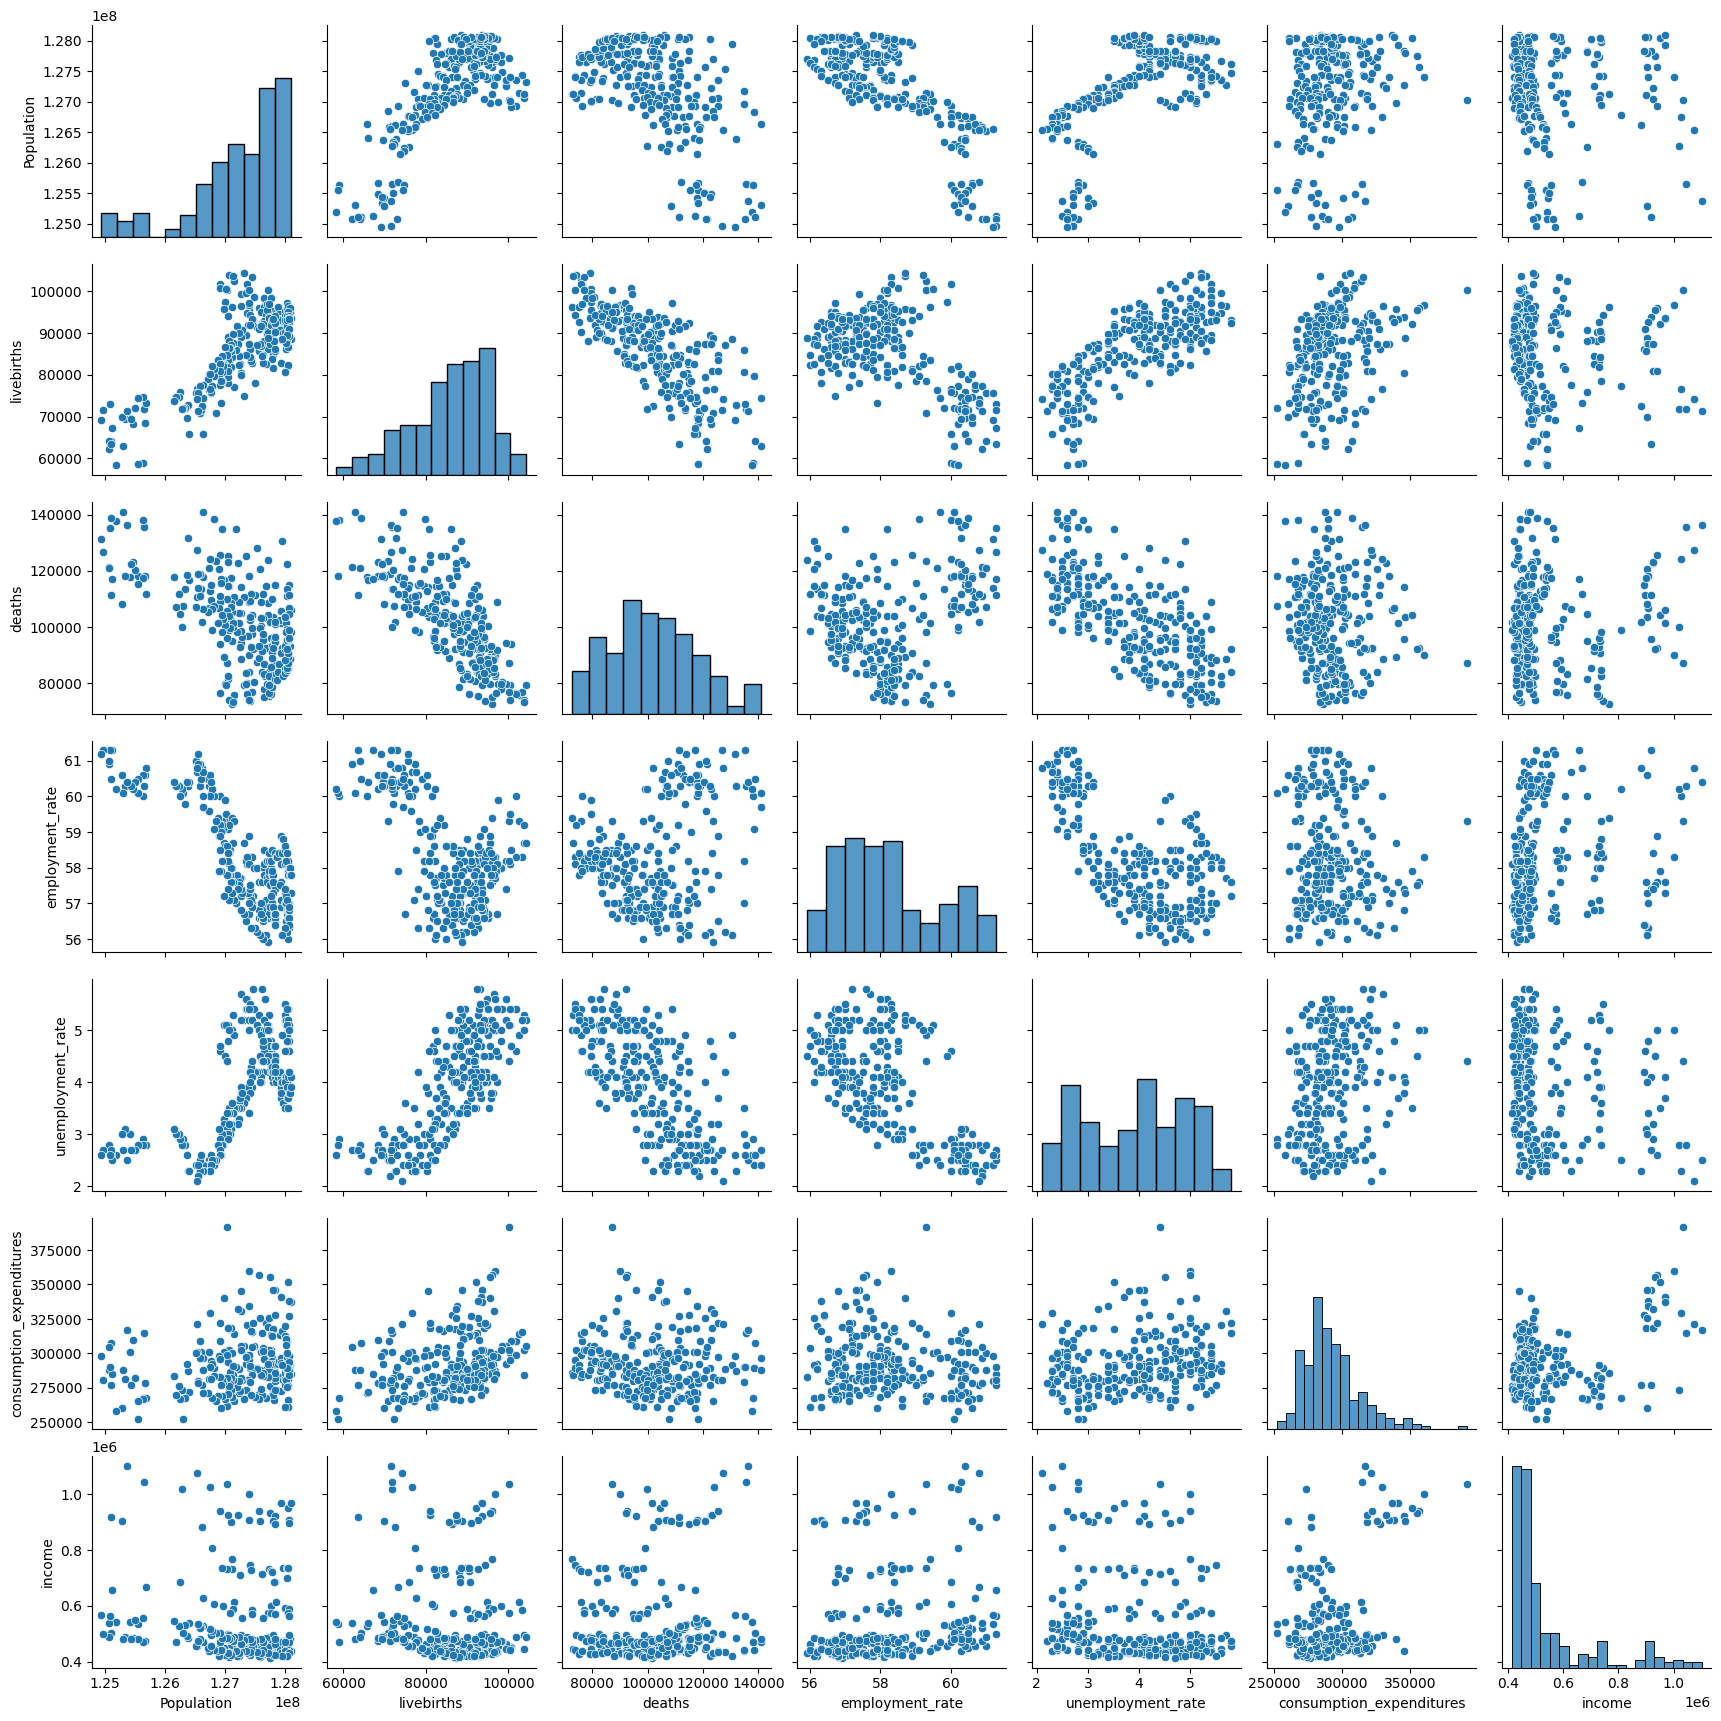

In [ ]:
# Selecting only numerical columns for the pairplot
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Pairplot using seaborn
sns.pairplot(numerical_df)
plt.show()

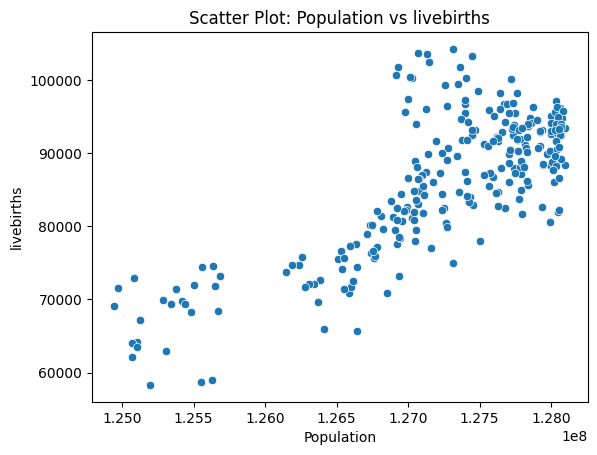

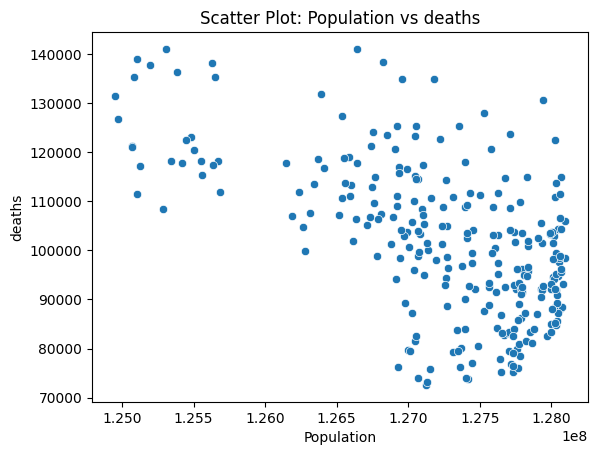

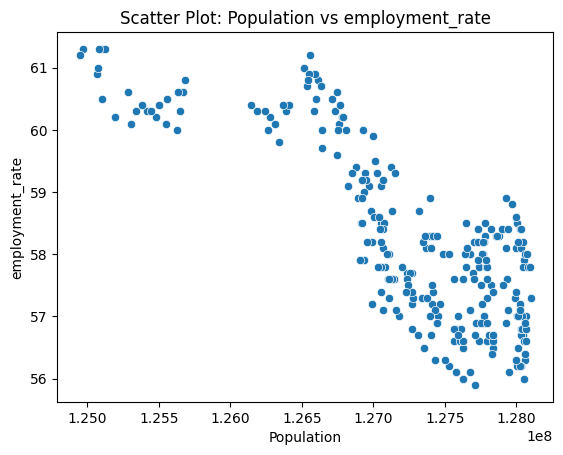

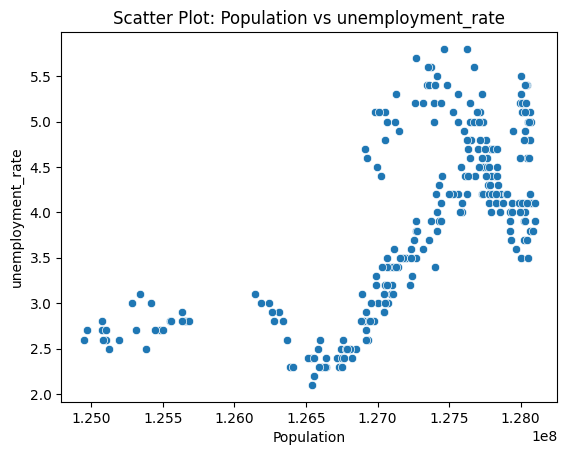

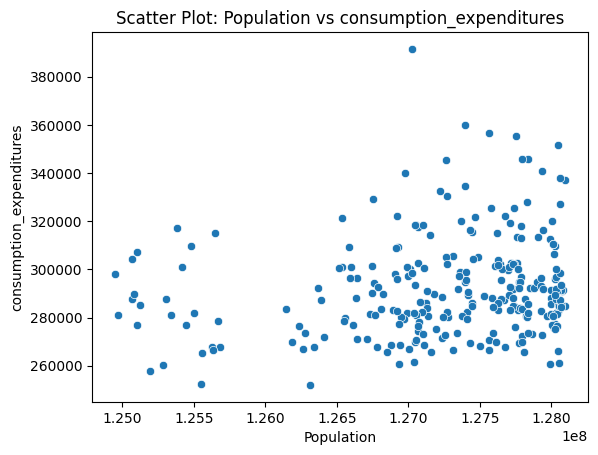

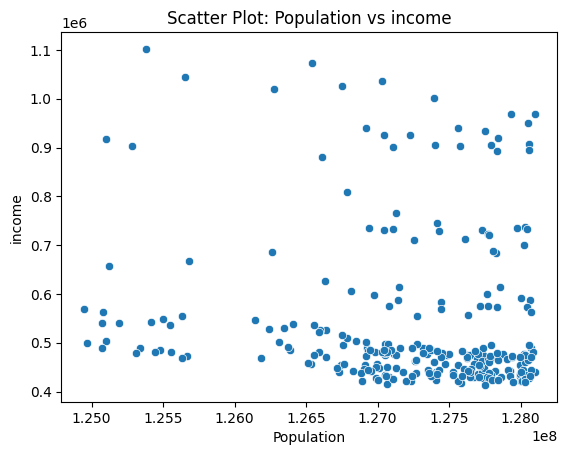

In [ ]:
# Scatter plot between Population and livebirths
sns.scatterplot(x='Population', y='livebirths', data=df)
plt.xlabel('Population')
plt.ylabel('livebirths')
plt.title('Scatter Plot: Population vs livebirths')
plt.show()
print("\n")

# Scatter plot between Population and deaths
sns.scatterplot(x='Population', y='deaths', data=df)
plt.xlabel('Population')
plt.ylabel('deaths')
plt.title('Scatter Plot: Population vs deaths')
plt.show()
print("\n")

# Scatter plot between Population and employment_rate
sns.scatterplot(x='Population', y='employment_rate', data=df)
plt.xlabel('Population')
plt.ylabel('employment_rate')
plt.title('Scatter Plot: Population vs employment_rate')
plt.show()
print("\n")

# Scatter plot between Population and unemployment_rate
sns.scatterplot(x='Population', y='unemployment_rate', data=df)
plt.xlabel('Population')
plt.ylabel('unemployment_rate')
plt.title('Scatter Plot: Population vs unemployment_rate')
plt.show()
print("\n")

# Scatter plot between Population and consumption_expenditures
sns.scatterplot(x='Population', y='consumption_expenditures', data=df)
plt.xlabel('Population')
plt.ylabel('consumption_expenditures')
plt.title('Scatter Plot: Population vs consumption_expenditures')
plt.show()
print("\n")

# Scatter plot between Population and income
sns.scatterplot(x='Population', y='income', data=df)
plt.xlabel('Population')
plt.ylabel('income')
plt.title('Scatter Plot: Population vs income')
plt.show()


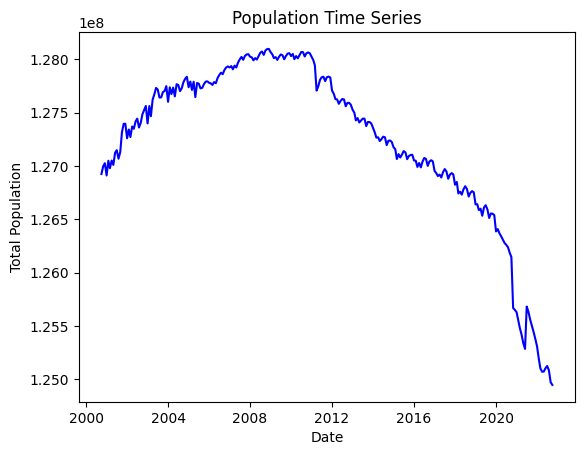

In [ ]:
# Population Time Series
plt.plot(df['Time'], df['Population'], color='blue')
plt.xlabel('Date')
plt.ylabel('Total Population')
plt.title('Population Time Series')
plt.show()

## Correlation

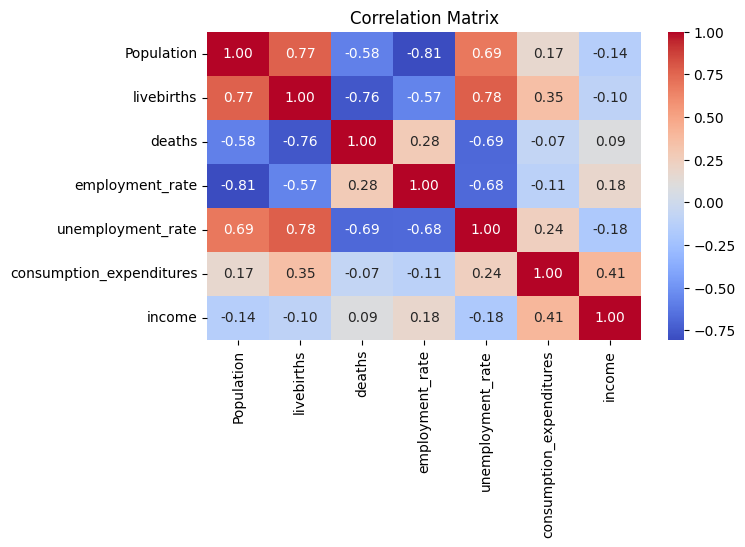

In [ ]:
# Selecting only numerical columns for correlation matrix
numeric_vars = df.select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_vars.corr()

# Plotting the correlation matrix using seaborn
plt.figure(figsize=(7, 4))
sns.heatmap(correlation_matrix, annot=True, cmap= "coolwarm", fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Selecting all numeric columns except the first column
numeric_vars = df_copy.iloc[:, 1:].select_dtypes(include=['float64', 'int64'])

# Calculating the correlation matrix
correlation_matrix = numeric_vars.corr()

print(correlation_matrix)

                          livebirths    deaths  employment_rate  \
livebirths                  1.000000 -0.761808        -0.572393   
deaths                     -0.761808  1.000000         0.275657   
employment_rate            -0.572393  0.275657         1.000000   
unemployment_rate           0.776742 -0.687349        -0.681775   
consumption_expenditures    0.351228 -0.065035        -0.109839   
income                     -0.096260  0.086829         0.179571   

                          unemployment_rate  consumption_expenditures  \
livebirths                         0.776742                  0.351228   
deaths                            -0.687349                 -0.065035   
employment_rate                   -0.681775                 -0.109839   
unemployment_rate                  1.000000                  0.242250   
consumption_expenditures           0.242250                  1.000000   
income                            -0.179107                  0.406569   

                  

# Explanatory Data Analysis

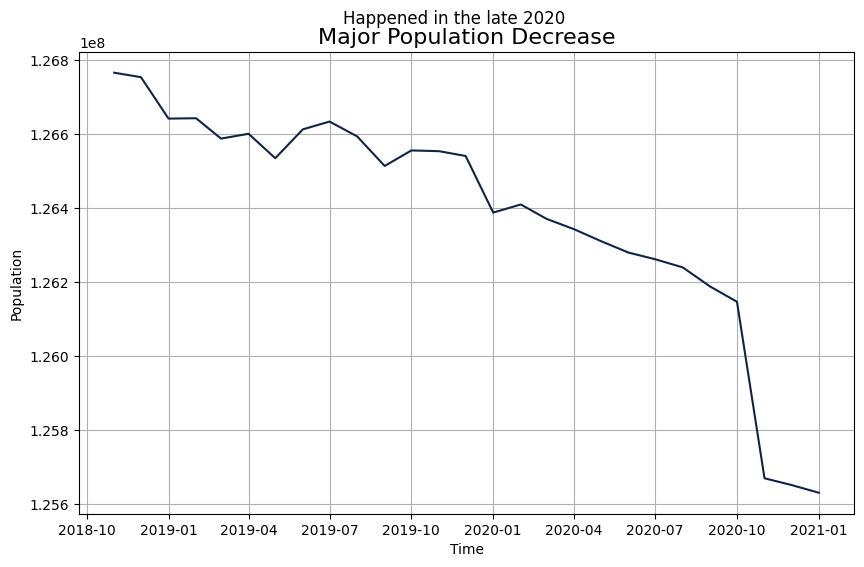

In [ ]:
# Filter the DataFrame based on date conditions
filtered_data = df[(df['Time'] >= "2018-10-19") & (df['Time'] <= "2021-01-08")]

# Plotting the filtered data
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Time'], filtered_data['Population'], color='#112446')
plt.xlabel('Time')
plt.ylabel('Population')
plt.title('Major Population Decrease', fontsize= 16)
plt.suptitle('Happened in the late 2020', fontsize=12, y=0.95)
plt.grid(True)
plt.show()

As of the late 2020s, Japan's population decreased significantly. As a result of a combination of factors, such as low birth rates and Covid 19 pandemic in 2019, immigration declined and deaths increased.

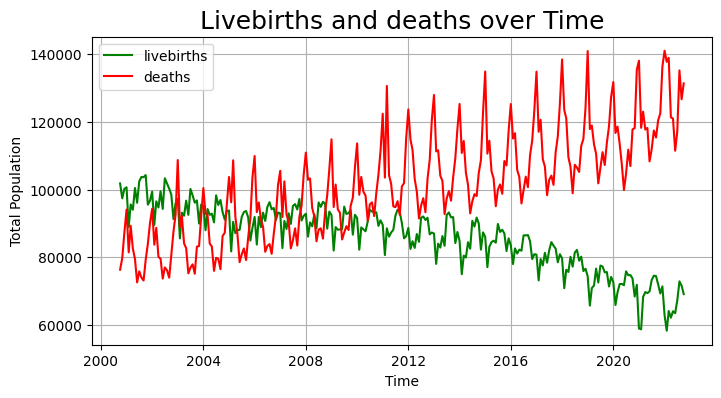

In [ ]:
plt.figure(figsize=(8, 4))

plt.plot(df['Time'], df['livebirths'], color='green', label='livebirths')
plt.plot(df['Time'], df['deaths'], color='red', label='deaths')

plt.xlabel('Time')
plt.ylabel('Total Population')
plt.legend()
plt.title('Livebirths and deaths over Time', fontsize = 18)
plt.grid()
plt.show()


Based on the graph above, total live births are decreasing meanwhile total deaths are keep increasing in Japan This signals a population decline in Japan, which has been the case for the past decade. The decreasing birth rate and increasing death rate are both concerning trends for the future of Japan's population.

<Figure size 1300x600 with 0 Axes>

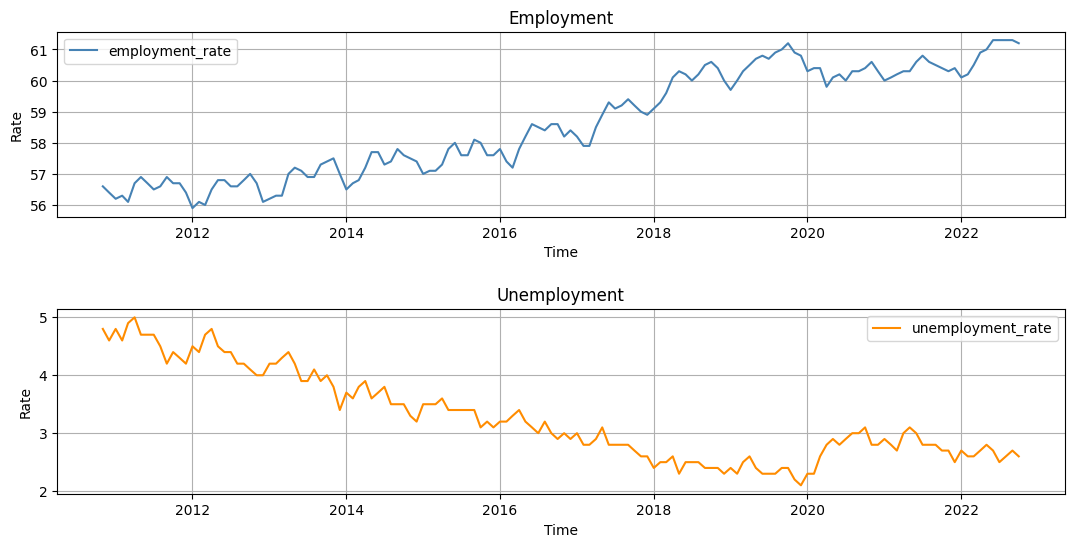

In [ ]:
# Filter data for the specified time range
filtered_data = df[df['Time'] >= "2010-10-19"]

# Melt the DataFrame to combine employment_rate and unemployment_rate
df_melted = filtered_data.melt(id_vars=['Time'], value_vars=['employment_rate', 'unemployment_rate'], var_name='rate_type', value_name='rate')

# Plot combined line chart
plt.figure(figsize=(13, 6))
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(13, 6))

i = 0

names = ["Employment", "Unemployment"]

for rate_type, color in zip(df_melted['rate_type'].unique(), ['steelblue', 'darkorange']):
    temp_data = df_melted[df_melted['rate_type'] == rate_type]
    axes[i].plot(temp_data['Time'], temp_data['rate'], label=rate_type, color=color)
    axes[i].set_xlabel("Time")
    axes[i].set_ylabel("Rate")
    axes[i].set_title(str(names[i]))
    axes[i].grid()
    axes[i].legend()
    i += 1


plt.subplots_adjust(hspace=0.5)
plt.legend()
plt.grid(True)

plt.show()

When someone is employed, people usually have little time to spend with their family, especially in Japan where overtime is common practice. Which could be a factor of the declining population.

# Feature Engineering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
ss = StandardScaler()
mm = MinMaxScaler()

# df_copy["Population"] = ss.fit_transform(np.array(df_copy["Population"]).reshape(-1,1))
df_copy["livebirths"] = ss.fit_transform(np.array(df_copy["livebirths"]).reshape(-1,1))
df_copy["employment_rate"] = mm.fit_transform(np.array(df_copy["employment_rate"]).reshape(-1,1))
df_copy["unemployment_rate"] = mm.fit_transform(np.array(df_copy["unemployment_rate"]).reshape(-1,1))



df_copy["deaths"] = ss.fit_transform(np.array(df_copy["deaths"]).reshape(-1,1))
df_copy["consumption_expenditures"] = ss.fit_transform(np.array(df_copy["consumption_expenditures"]).reshape(-1,1))
df_copy["income"] = ss.fit_transform(np.array(df_copy["income"]).reshape(-1,1))


In [ ]:
df_copy.head()


,Population,livebirths,deaths,employment_rate,unemployment_rate,consumption_expenditures,income
0,126925843,1.666221,-1.628798,0.759259,0.675676,0.809320,-0.334468
1,126998000,1.203883,-1.409323,0.740741,0.648649,0.230670,-0.536059
2,127027000,1.500958,-0.925824,0.629630,0.621622,4.764786,3.123929
3,126912000,1.546049,-0.490399,0.481481,0.702703,0.795825,-0.556973
4,127050000,0.312029,-1.300419,0.481481,0.729730,0.065176,-0.419015


# Testing Model

In [ ]:
from sklearn.model_selection import train_test_split

X = df_copy.drop("Population", axis = 1)
X = df_copy.drop("consumption_expenditures", axis = 1)
X = df_copy.drop("income", axis = 1)
y = df_copy["Population"]

xtrain, xtest, ytrain, ytest = train_test_split(X,y , train_size=0.8, shuffle = False)

We drop "Consumption_expenditures" and "income" features because the correlation with "Population" variable is very small.

##Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.metrics import r2_score

model1 = LinearRegression()
model1.fit(xtrain, ytrain)

model1_predict = model1.predict(xtest)

# Print model coefficients and intercept
print("R2   : ",r2_score(model1_predict,ytest))
print("MAE  : ",metrics.mean_absolute_error(model1_predict,ytest))
print("RMSE : ",np.sqrt(mean_squared_error(ytest, model1_predict)))
print("MSE  : ",metrics.mean_squared_error(ytest, model1_predict))

R2   :  1.0
MAE  :  6.747695634949882e-09
RMSE :  1.0027387513376073e-08
MSE  :  1.005485003434104e-16


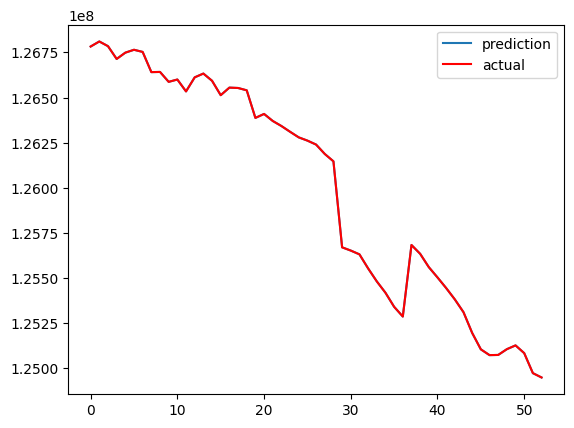

In [ ]:
plt.plot(range(0,len(model1_predict)), model1_predict, label = "prediction")
plt.plot(range(len(model1_predict)), ytest, color = "red", label = "actual")
plt.legend()

## KNN Regression

In [ ]:
#training KNN regression
from sklearn.neighbors import KNeighborsRegressor
KNN_regression = KNeighborsRegressor(n_neighbors = 19)
KNN_regression.fit(xtrain, ytrain)
#testing
y_predict=KNN_regression.predict(xtest)


# Print model coefficients and intercept
print("R2   : ",r2_score(y_predict,ytest))
print("MAE  : ",metrics.mean_absolute_error(y_predict,ytest))
print("RMSE : ",np.sqrt(mean_squared_error(ytest, y_predict)))
print("MSE  : ",metrics.mean_squared_error(ytest, y_predict))

R2   :  -5.403655054653661e+27
MAE  :  897766.43296921
RMSE :  1095377.766691346
MSE  :  1199852451761.7207


## SVR

In [ ]:
#training regression
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
import warnings
warnings.filterwarnings('ignore')

SVM_regression = make_pipeline(SVR(kernel = 'linear', gamma = "auto"))
SVM_regression.fit(xtrain, ytrain)

#testing
y_predict=SVM_regression.predict(xtest)

#calculate error for training and testing
print("R2   : ",r2_score(y_predict,ytest))
print("MAE  : ",metrics.mean_absolute_error(y_predict,ytest))
print("RMSE : ",np.sqrt(mean_squared_error(ytest, y_predict)))
print("MSE  : ",metrics.mean_squared_error(ytest, y_predict))

## Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
y_predict=dtr.predict(xtest)

#calculate error for training and testing
print("R2   : ",r2_score(y_predict,ytest))
print("MAE  : ",metrics.mean_absolute_error(y_predict,ytest))
print("RMSE : ",np.sqrt(mean_squared_error(ytest, y_predict)))
print("MSE  : ",metrics.mean_squared_error(ytest, y_predict))


## Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rdr = RandomForestRegressor(n_estimators=400, criterion = "squared_error")

rdr.fit(xtrain,ytrain)
y_predict=rdr.predict(xtest)

#calculate error for training and testing
print("R2   : ",r2_score(y_predict,ytest))
print("MAE  : ",metrics.mean_absolute_error(y_predict,ytest))
print("RMSE : ",np.sqrt(mean_squared_error(ytest, y_predict)))
print("MSE  : ",metrics.mean_squared_error(ytest, y_predict))

In [ ]:
plt.plot(range(0,len(y_predict)), y_predict, label = "prediction")
plt.plot(range(len(y_predict)), ytest, color = "red", label = "actual")
plt.legend()


## MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

mlpr = MLPRegressor(hidden_layer_sizes=(200,200,200), max_iter = 20000)

mlpr.fit(xtrain,ytrain)
y_predict=mlpr.predict(xtest)

#calculate error for training and testing
print("R2   : ",r2_score(y_predict,ytest))
print("MAE  : ",metrics.mean_absolute_error(y_predict,ytest))
print("RMSE : ",np.sqrt(mean_squared_error(ytest, y_predict)))
print("MSE  : ",metrics.mean_squared_error(ytest, y_predict))